In [11]:
import numpy as np
import pandas as pd
import os
import sys

from astropy import units as u
from astropy.coordinates import SkyCoord

from astropy.timeseries import LombScargle

# import tkinter
# %matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
import matplotlib
# matplotlib.use('TkAgg')

# matplotlib.use('TkAgg')
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import gridspec

import seaborn as sns
sns.set(style="darkgrid")

In [12]:
data_dir = '../data/'
object = 'J1503.7-5801'
ebin_number = 0

# filename_out10  = data_dir+object+'/'+'out10_lc_e'+str(ebin_number)+'.txt'
filename_out10  = data_dir+'out10s_offset/'+'out10_lc_e'+str(ebin_number)+'.s5.txt'
filename_out10_1  = data_dir+'out10s_offset/'+'out10_lc_e'+str(ebin_number)+'.s1.txt'
filename_out10_2  = data_dir+'out10s_offset/'+'out10_lc_e'+str(ebin_number)+'.s2.txt'
filename_out10_3  = data_dir+'out10s_offset/'+'out10_lc_e'+str(ebin_number)+'.s3.txt'
filename_out10_4  = data_dir+'out10s_offset/'+'out10_lc_e'+str(ebin_number)+'.s4.txt'


In [13]:
'''
out10 file
day binning
'''
out10 = np.loadtxt(filename_out10)
out10_1 = np.loadtxt(filename_out10_1)
out10_2 = np.loadtxt(filename_out10_2)
out10_3 = np.loadtxt(filename_out10_3)
out10_4 = np.loadtxt(filename_out10_4)

## DATA
time_bin_start = out10[:,0]/(60*60*24) + 2451910.5 
time_bin_end   = out10[:,0] + out10[:,1]/(60*60*24) + 2451910.5

time_bin_start-= np.amin(time_bin_start)
time_bin_end  -= np.amin(time_bin_start)

counts_bin     = out10[:,2]
exposure_bin   = out10[:,4]


## DATA
time_bin_start_1 = out10_1[:,0]
time_bin_end_1   = out10_1[:,0] + out10_1[:,1]

counts_bin_1     = out10_1[:,2]
exposure_bin_1   = out10_1[:,4]


## DATA
time_bin_start_2 = out10_2[:,0]
time_bin_end_2   = out10_2[:,0] + out10_2[:,1]

counts_bin_2     = out10_2[:,2]
exposure_bin_2   = out10_2[:,4]


## DATA
time_bin_start_3 = out10_3[:,0]
time_bin_end_3   = out10_3[:,0] + out10_3[:,1]

counts_bin_3     = out10_3[:,2]
exposure_bin_3   = out10_3[:,4]


## DATA
time_bin_start_4 = out10_4[:,0]
time_bin_end_4   = out10_4[:,0] + out10_4[:,1]

counts_bin_4     = out10_4[:,2]
exposure_bin_4   = out10_4[:,4]

# out10 = np.loadtxt(filename_out10)
# print('out10 fileshape: '+str(out10.shape))

# time_bin_start = out10[:,0]
# time_bin_end   = time_bin_start + out10[:,1]

# counts_bin     = out10[:,2]
# exposure_bin   = out10[:,4]

# total_counts_out10 = np.sum(counts_bin)
# print('Total counts from out10: '+str(int(total_counts_out10)))

# ## sampling array
# sample_rate = 5
# sample_offset = 0
# time_bin_start_samp = time_bin_start[sample_offset:-sample_rate:sample_rate]
# time_bin_end_samp = time_bin_end[sample_offset+sample_rate-1::sample_rate]
# num_samp_bins = len(time_bin_start_samp)

# time_bin_samp_mets = (time_bin_start_samp + time_bin_end_samp)/2
# time_bin_samp_days = time_bin_samp_mets/(60*60*24) + 2451910.5
# time_bin_samp_days-= time_bin_samp_days.min()
# # print(time_bin_start_samp[:5])
# # print(time_bin_end_samp[:5])

# counts_bin_samp = np.zeros(num_samp_bins)
# exposure_bin_samp = np.zeros(num_samp_bins)
# for ii in range(0,num_samp_bins):
#     samp_arr = np.logical_and(time_bin_start>=time_bin_start_samp[ii], time_bin_end<=time_bin_end_samp[ii])
#     counts_bin_samp[ii] = np.sum(counts_bin[samp_arr])
#     exposure_bin_samp[ii] = np.sum(exposure_bin[samp_arr])
# print('Number condensed bins: '+str(len(time_bin_start_samp)))

# ## renormalize exposure to counts
# counts_bin_samp_avg = np.mean(counts_bin_samp[ii])
# exposure_bin_samp_avg = np.mean(exposure_bin_samp)

# # exposure_bin_samp*= counts_bin_samp_avg/exposure_bin_samp_avg

# # print(counts_bin_samp[:5])
# # print(exposure_bin_samp[:5])

In [14]:
# print( np.amax(time_bin_start - time_bin_start_1) )
# print( np.amax(time_bin_start - time_bin_start_2) )
# print( np.amax(time_bin_start - time_bin_start_3) )
# print( np.amax(time_bin_start - time_bin_start_4) )

# exposure_bin_1 /= exposure_bin 
# exposure_bin_2 /= exposure_bin 
# exposure_bin_3 /= exposure_bin 
# exposure_bin_4 /= exposure_bin 

print(np.nanmedian(exposure_bin_1/exposure_bin))
print(np.nanmedian(exposure_bin_2/exposure_bin))
print(np.nanmedian(exposure_bin_3/exposure_bin))
print(np.nanmedian(exposure_bin_4/exposure_bin))

0.9932835102566532
0.9932835102566532
0.9999233210289142
1.000168978802791


C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


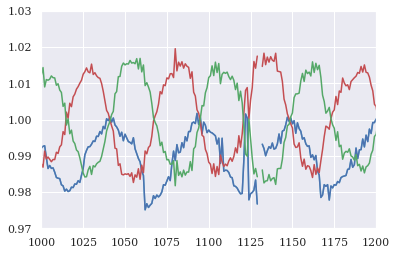

In [15]:
###
### PLOT
###
font = {'family' : 'serif',
		'weight' : 'normal',
		'size'   : 12}

matplotlib.rc('font', **font)

cmap2 = plt.get_cmap('gist_stern_r')
cmap  = plt.get_cmap('Greys')#'gnuplot2')#'BuPu_r')
fig = plt.figure()

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])

# ax0.plot(time_bin_start, exposure_bin, color='k')
ax0.plot(time_bin_start, exposure_bin_1/exposure_bin, color='c')
ax0.plot(time_bin_start, exposure_bin_2/exposure_bin, color='b')
ax0.plot(time_bin_start, exposure_bin_3/exposure_bin, color='r')
ax0.plot(time_bin_start, exposure_bin_4/exposure_bin, color='g')

expo_mean = np.mean(exposure_bin)
# ax0.plot(time_bin_start, exposure_bin, color='k')
# ax0.plot(time_bin_start, exposure_bin_1, color='c')
# ax0.plot(time_bin_start, exposure_bin_2, color='b')
# ax0.plot(time_bin_start, exposure_bin_3, color='r')
# ax0.plot(time_bin_start, exposure_bin_4, color='g')

ax0.set_xlim([1000,1200])
ax0.set_ylim([0.97,1.03])
plt.savefig('expo_norm.png', dpi=400)
# plt.show()



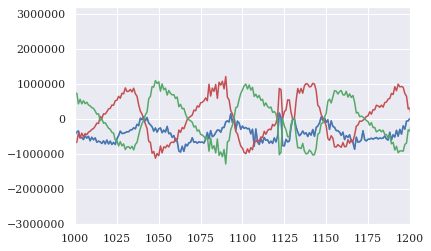

In [16]:
###
### PLOT
###
font = {'family' : 'serif',
		'weight' : 'normal',
		'size'   : 12}

matplotlib.rc('font', **font)

cmap2 = plt.get_cmap('gist_stern_r')
cmap  = plt.get_cmap('Greys')#'gnuplot2')#'BuPu_r')
fig = plt.figure()

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])

# ax0.plot(time_bin_start, exposure_bin, color='k')
ax0.plot(time_bin_start, exposure_bin_1-exposure_bin, color='c')
ax0.plot(time_bin_start, exposure_bin_2-exposure_bin, color='b')
ax0.plot(time_bin_start, exposure_bin_3-exposure_bin, color='r')
ax0.plot(time_bin_start, exposure_bin_4-exposure_bin, color='g')

expo_mean = np.mean(exposure_bin)
# ax0.plot(time_bin_start, exposure_bin, color='k')
# ax0.plot(time_bin_start, exposure_bin_1, color='c')
# ax0.plot(time_bin_start, exposure_bin_2, color='b')
# ax0.plot(time_bin_start, exposure_bin_3, color='r')
# ax0.plot(time_bin_start, exposure_bin_4, color='g')

ax0.set_xlim([1000,1200])
# ax0.set_ylim([0.97,1.03])
# plt.savefig('expo_norm.png', dpi=400)
plt.show()
plt.close()


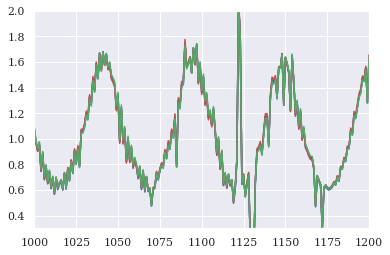

In [23]:
###
### PLOT
###
font = {'family' : 'serif',
		'weight' : 'normal',
		'size'   : 12}

matplotlib.rc('font', **font)

cmap2 = plt.get_cmap('gist_stern_r')
cmap  = plt.get_cmap('Greys')#'gnuplot2')#'BuPu_r')
fig = plt.figure()

gs = gridspec.GridSpec(1, 1)
ax0 = plt.subplot(gs[0,0])

# ax0.plot(time_bin_start, exposure_bin, color='k')
# ax0.plot(time_bin_start, exposure_bin_1/exposure_bin_1, color='c')
# ax0.plot(time_bin_start, exposure_bin_2/exposure_bin_1, color='b')
# ax0.plot(time_bin_start, exposure_bin_3/exposure_bin_1, color='r')
# ax0.plot(time_bin_start, exposure_bin_4/exposure_bin_1, color='g')

expo_mean = np.mean(exposure_bin)
ax0.plot(time_bin_start, exposure_bin/expo_mean, color='k')
ax0.plot(time_bin_start, exposure_bin_1/expo_mean, color='c')
ax0.plot(time_bin_start, exposure_bin_2/expo_mean, color='b')
ax0.plot(time_bin_start, exposure_bin_3/expo_mean, color='r')
ax0.plot(time_bin_start, exposure_bin_4/expo_mean, color='g')

ax0.set_xlim([1000,1200])
ax0.set_ylim([0.3,2])
# plt.show()
plt.savefig('expo.png', dpi=400)

Exposure Power: 0.2186316339465862
Exposure Power: 0.22143192548640886
Exposure Power: 0.22143192548640886
Exposure Power: 0.21695449317857418
Exposure Power: 0.2205935429292693


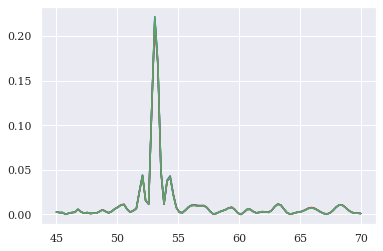

In [18]:
''' Finding power at 53-days '''

num_freq = 100
# period = np.linspace(52, 54, num=num_freq)
period = np.linspace(45, 70, num=num_freq)
freq = 1/period

# power_array = np.zeros([num_along_dim, num_along_dim, num_freq])
# for ii in range(0,num_along_dim):
#     for jj in range(0,num_along_dim):
# #         print(time_bin_samp_days.shape, photon_grid[:,ii,jj].shape)
# #         blah = LombScargle(time_bin_samp_days[:num_bins_analyze], photon_grid[:,ii,jj]).power(freq)
#         power_array[ii,jj] = LombScargle(time_bin_samp_days[:num_bins_analyze], photon_grid[:,ii,jj]).power(freq)

# power_array = np.max(power_array,axis=-1)

exposure_power_array = LombScargle(time_bin_start, exposure_bin).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'k')


exposure_power_array = LombScargle(time_bin_start, exposure_bin_1).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'c')


exposure_power_array = LombScargle(time_bin_start, exposure_bin_2).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'b')

exposure_power_array = LombScargle(time_bin_start, exposure_bin_3).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'r')

exposure_power_array = LombScargle(time_bin_start, exposure_bin_4).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'g')


plt.show()

Exposure Power: 0.09404120778843328
Exposure Power: 0.09404120778843328
Exposure Power: 0.39504066771328283
Exposure Power: 0.3744127577700998


C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide


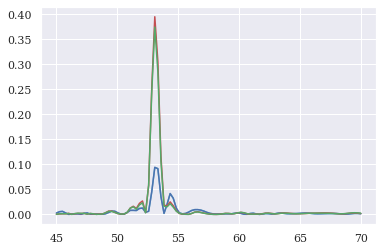

In [19]:

expo_temp = exposure_bin_1/exposure_bin
time_bin_start_temp = time_bin_start[np.isfinite(expo_temp)]
expo_temp = expo_temp[np.isfinite(expo_temp)]
exposure_power_array = LombScargle(time_bin_start_temp, expo_temp).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'c')


expo_temp = exposure_bin_2/exposure_bin
time_bin_start_temp = time_bin_start[np.isfinite(expo_temp)]
expo_temp = expo_temp[np.isfinite(expo_temp)]
exposure_power_array = LombScargle(time_bin_start_temp, expo_temp).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'b')


expo_temp = exposure_bin_3/exposure_bin
time_bin_start_temp = time_bin_start[np.isfinite(expo_temp)]
expo_temp = expo_temp[np.isfinite(expo_temp)]
exposure_power_array = LombScargle(time_bin_start_temp, expo_temp).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'r')

expo_temp = exposure_bin_4/exposure_bin
time_bin_start_temp = time_bin_start[np.isfinite(expo_temp)]
expo_temp = expo_temp[np.isfinite(expo_temp)]
exposure_power_array = LombScargle(time_bin_start_temp, expo_temp).power(freq)
exposure_power = np.max(exposure_power_array)
# print('Exposure Power array: '+str(exposure_power_array))
print('Exposure Power: '+str(np.amax(exposure_power_array)))
plt.plot(period, exposure_power_array, 'g')

plt.show()

In [20]:
blah = exposure_bin_2/exposure_bin_1
print(np.nanmax(blah))

1.0


C:\Users\psyko\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
